In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('pima_indians_diabetes.csv')

# Inspect data
print(df.head())
print(df.tail())
print(df.info())  # Check data types
print(df.describe())  # Summary statistics


   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50    1.0
1     1    85    66    29     0  26.6  0.351   31    0.0
2     8   183    64     0     0  23.3  0.672   32    NaN
3     1    89    66    23    94  28.1  0.167   21    0.0
4     0   137    40    35   168  43.1  2.288   33    1.0
     preg  plas  pres  skin  test  mass   pedi  age  class
763    10   101    76    48   180  32.9  0.171   63    0.0
764     2   122    70    27     0  36.8  0.340   27    0.0
765     5   121    72    23   112  26.2  0.245   30    0.0
766     1   126    60     0     0  30.1  0.349   47    1.0
767     1    93    70    31     0  30.4  0.315   23    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    76

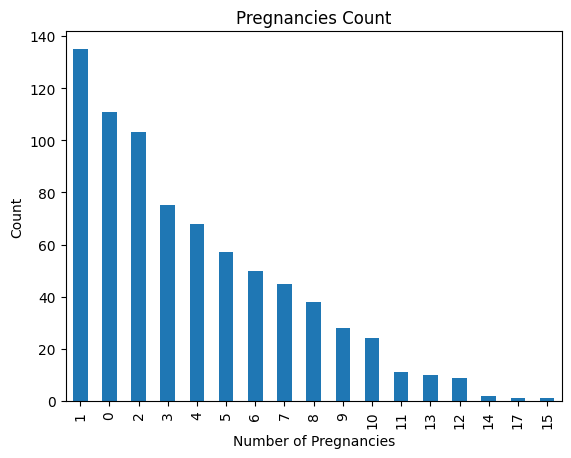

In [5]:


df['preg'].value_counts().plot(kind='bar')
plt.title('Pregnancies Count')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()


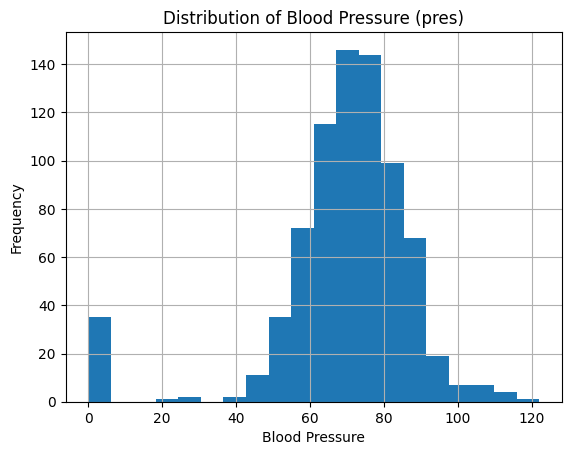

In [6]:


# Plot histogram
df['pres'].hist(bins=20)
plt.title('Distribution of Blood Pressure (pres)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()


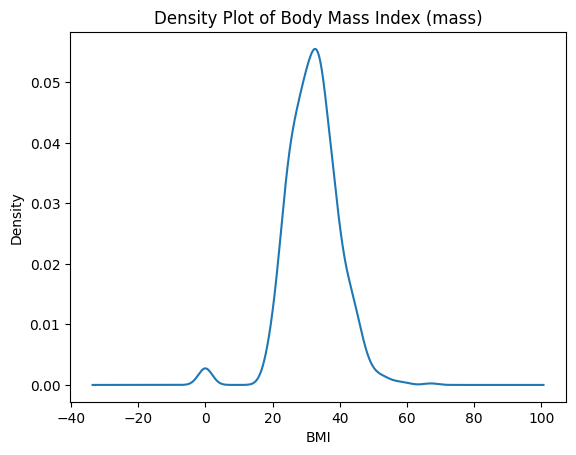

In [2]:
df['mass'].plot(kind='density')
plt.title('Density Plot of Body Mass Index (mass)')
plt.xlabel('BMI')
plt.show()


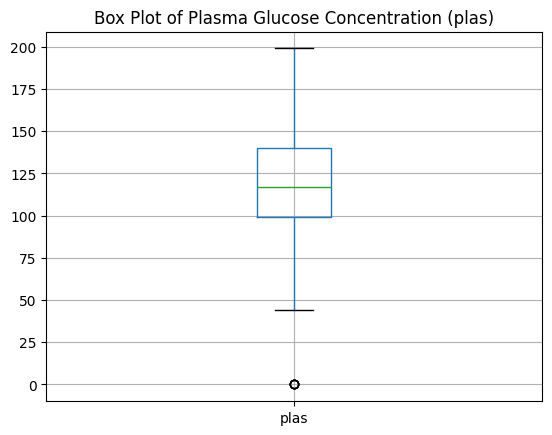

In [3]:
df.boxplot(column=['plas'])
plt.title('Box Plot of Plasma Glucose Concentration (plas)')
plt.show()


In [4]:
# Calculate skewness for each column
skewness = df.skew()
print(f"Skewness of Dataset:\n{skewness}")


Skewness of Dataset:
preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.640793
dtype: float64


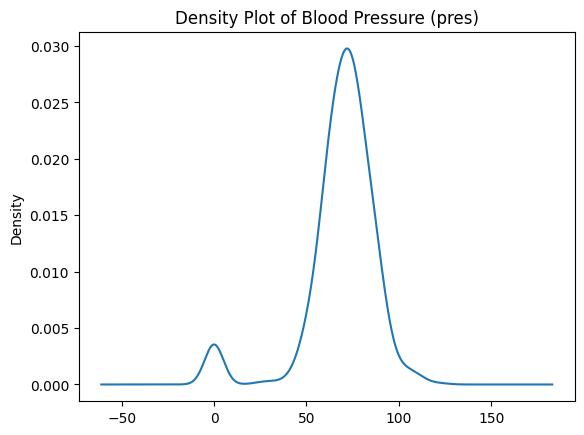

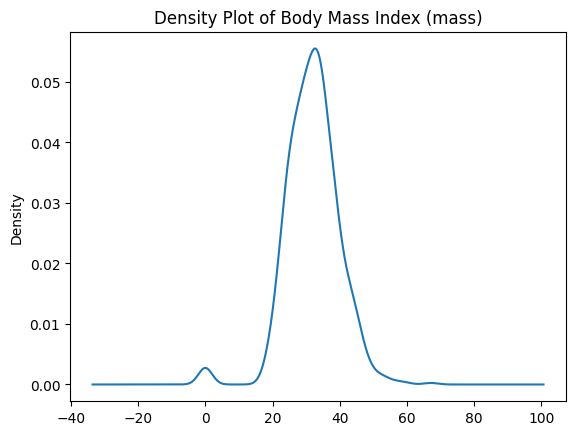

In [5]:

df['pres'].plot(kind='density')
plt.title('Density Plot of Blood Pressure (pres)')
plt.show()

df['mass'].plot(kind='density')
plt.title('Density Plot of Body Mass Index (mass)')
plt.show()


           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.222680  0.465023  0.065102  0.076487  0.132854  0.295087  0.178417   

            age     class  
preg   0.544341  0.222680  
plas   0.263514  0.465023  
pres   0.239528  0.065102  
skin  -0.113970  0.076487  
test  -0.042163  0.132854  
mass   0.036242  0.295087  
pedi   0.0335

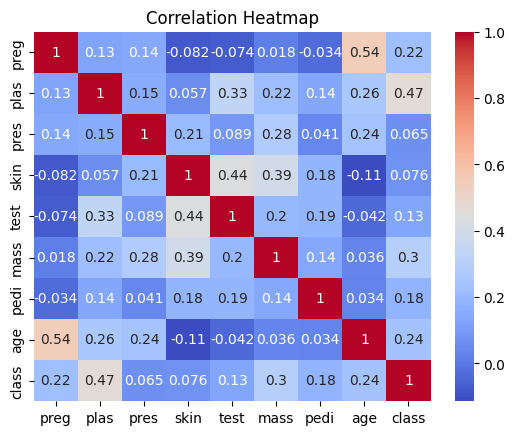

In [2]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
X = df[['preg']].values  # Independent variable
y = df['age'].values  # Dependent variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(f"R-squared for Pregnancies vs Age: {model.score(X_test, y_test)}")


R-squared for Pregnancies vs Age: 0.2543448410033263


In [7]:
# Predict age based on the number of pregnancies
new_preg_data = [[5], [10], [15]]  # Example: Number of pregnancies
predicted_ages = model.predict(new_preg_data)

print(f"Predicted ages for pregnancies {new_preg_data}: {predicted_ages}")


Predicted ages for pregnancies [[5], [10], [15]]: [35.3214238  44.92216352 54.52290325]


In [8]:
# Prepare data
X = df[['plas', 'mass', 'pedi']].values  # Independent variables
y = df['age'].values  # Dependent variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
print(f"R-squared for Multiple Regression: {model.score(X_test, y_test)}")


R-squared for Multiple Regression: 0.028692751180003806


In [9]:
# Predict age based on multiple features
new_data = [[120, 30.5, 0.6], [140, 25.0, 0.8]]  # Example: [plas, mass, pedi]
predicted_ages_multiple = model.predict(new_data)

print(f"Predicted ages for new data {new_data}: {predicted_ages_multiple}")


Predicted ages for new data [[120, 30.5, 0.6], [140, 25.0, 0.8]]: [32.8756407  35.24412777]


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Function to calculate R-squared for each feature
def test_r_squared(feature):
    X = df[[feature]].values  # Independent variable
    y = df['age'].values  # Dependent variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Test R-squared for all independent variables
features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi']
for feature in features:
    r_squared = test_r_squared(feature)
    print(f"R-squared for {feature} vs age: {r_squared}")


R-squared for preg vs age: 0.2543448410033263
R-squared for plas vs age: 0.04043425420384439
R-squared for pres vs age: 0.039590936856064185
R-squared for skin vs age: -0.04175724727540131
R-squared for test vs age: -0.01584733483607592
R-squared for mass vs age: -0.016088666615859504
R-squared for pedi vs age: -0.014635671828191699
